# Haar Cascade 
- Image
- Realtime Video

## Image use case

1. Import Library dan Inisialisasi Classifier
- Pada bagian ini, kita mengimpor library yang diperlukan dan memuat pre-trained Haar Cascade classifier untuk deteksi wajah, mata, dan senyum.
- https://github.com/opencv/opencv/tree/master/data/haarcascades

In [1]:
import cv2
import matplotlib.pyplot as plt

# Memuat Haar Cascade classifier untuk deteksi wajah, mata, dan senyum
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# cv2.CascadeClassifier: Digunakan untuk memuat model Haar Cascade yang telah dilatih sebelumnya.
# cv2.data.haarcascades: Menyediakan path ke folder yang berisi file cascade XML.

2. Membaca Gambar dan Preprocessing
Di bagian ini, kita membaca gambar dari file dan mengonversinya ke grayscale. Pengubahan ke grayscale dapat meningkatkan performa deteksi karena model Haar Cascade bekerja lebih baik dengan citra satu channel.

In [2]:
# Membaca gambar
image = cv2.imread(r"geoffrey Hinton.jpg")

# Mengonversi gambar ke grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# cv2.imread(): Membaca gambar dari file.
# cv2.cvtColor(): Mengubah ruang warna gambar dari BGR (default OpenCV) ke grayscale.

In [3]:
# Mendeteksi wajah dalam gambar
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(10, 10))
#detectMultiScale: Mendeteksi objek (wajah) pada gambar dengan skala dan parameter tertentu.

4. Deteksi Mata dan Senyum dalam ROI (Region of Interest)
Setelah mendeteksi wajah, kita mendefinisikan ROI di dalam tiap wajah untuk mencari mata dan senyum.

In [4]:
for (x, y, w, h) in faces:
    # Menggambar bounding box untuk wajah dan menambahkan label "Face"
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(image, "Face", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    # Mendefinisikan ROI (Region of Interest) untuk mendeteksi mata dan senyum dalam area wajah
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]

    # Mendeteksi mata di dalam ROI
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10, minSize=(15, 15))
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        cv2.putText(roi_color, "Eye", (ex, ey - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    # Mendeteksi senyum di dalam ROI
    smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.7, minNeighbors=22, minSize=(25, 25))
    for (sx, sy, sw, sh) in smiles:
        cv2.rectangle(roi_color, (sx, sy), (sx+sw, sy+sh), (0, 0, 255), 2)
        cv2.putText(roi_color, "Smile", (sx, sy - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)


5. Menampilkan Hasil Deteksi
Pada bagian akhir, kita menampilkan hasil deteksi menggunakan matplotlib. Karena OpenCV menyimpan gambar dalam format BGR, kita perlu mengonversinya ke format RGB agar warnanya tampil dengan benar.

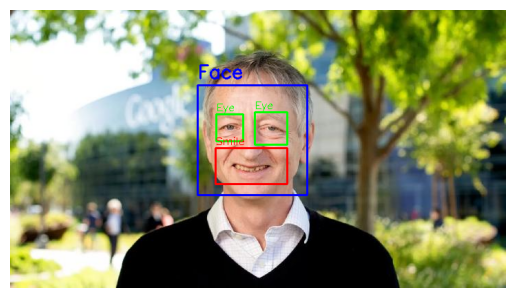

In [5]:
# Menampilkan hasil deteksi
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
# cv2.cvtColor(image, cv2.COLOR_BGR2RGB): Mengonversi format warna dari BGR ke RGB.
# plt.axis("off"): Menghilangkan sumbu agar tampilan gambar lebih bersih.
# plt.show(): Menampilkan gambar di output notebook.

## Deteksi Secara Realtime
- VideoCapture(0): Mengambil video dari kamera default.
- cv2.cvtColor: Mengonversi frame ke grayscale karena deteksi Haar Cascade bekerja lebih baik dengan satu channel.
- detectMultiScale: Mendeteksi wajah, mata, dan senyum dalam frame dengan parameter seperti scaleFactor, minNeighbors, dan minSize yang disesuaikan.
- cv2.rectangle: Menggambar kotak (bounding box) di sekitar objek yang terdeteksi.
- cv2.putText: Menambahkan label teks (misalnya "Face", "Eye", "Smile") di atas bounding box.
- cv2.imshow: Menampilkan frame realtime dengan deteksi.
- cv2.waitKey(1): Menunggu selama 1 ms untuk penekanan tombol. Jika tombol 'q' ditekan, loop akan berhenti.
- cap.release() & cv2.destroyAllWindows(): Melepaskan perangkat kamera dan menutup jendela tampilan.

In [6]:
# # Inisialisasi VideoCapture untuk mengambil video dari kamera (0 = kamera default)
# cap = cv2.VideoCapture(0)

# while True:
#     # Membaca frame dari kamera
#     ret, frame = cap.read()
#     if not ret:
#         break  # Jika gagal membaca frame, hentikan loop
    
#     # Mengonversi frame ke grayscale untuk meningkatkan performa deteksi
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
#     # Mendeteksi wajah pada frame grayscale
#     faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
#     # Untuk tiap wajah yang terdeteksi
#     for (x, y, w, h) in faces:
#         # Menggambar bounding box pada wajah
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
#         # Menambahkan label "Face"
#         cv2.putText(frame, "Face", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
        
#         # Mendefinisikan ROI (Region of Interest) untuk deteksi mata dan senyum dalam area wajah
#         roi_gray = gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]
        
#         # Mendeteksi mata di dalam ROI
#         eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10, minSize=(15, 15))
#         for (ex, ey, ew, eh) in eyes:
#             cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
#             cv2.putText(roi_color, "Eye", (ex, ey - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        
#         # Mendeteksi senyum di dalam ROI
#         smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.7, minNeighbors=22, minSize=(25, 25))
#         for (sx, sy, sw, sh) in smiles:
#             cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 0, 255), 2)
#             cv2.putText(roi_color, "Smile", (sx, sy - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    
#     # Tampilkan frame dengan deteksi
#     cv2.imshow('Realtime Face, Eye, and Smile Detection', frame)
    
#     # Tekan 'q' untuk keluar dari loop
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # Lepaskan kamera dan tutup semua jendela OpenCV
# cap.release()
# cv2.destroyAllWindows()


# Faster R-CNN
Dataset COCO-Format Kustom
Di bawah ini, kita membuat kelas CocoDataset untuk memuat dataset COCO-format. Kelas ini menggunakan pycocotools.coco.COCO untuk membaca anotasi dari file JSON dan menghasilkan (image, target) dalam format yang dibutuhkan oleh model Faster R-CNN di PyTorch.

source data : https://www.kaggle.com/datasets/sharansmenon/aquarium-dataset?resource=download

##  Import Library dan Definisi Transformasi
- Kami menggunakan Albumentations untuk augmentasi dan transformasi gambar.
- Transformasi diatur dalam format COCO (bounding box dalam format [xmin, ymin, width, height])ds)


In [1]:
import os
import sys
import math
import copy
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2

import torch
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader, Dataset
from torchvision import models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from pycocotools.coco import COCO
import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm
from torchmetrics.detection.mean_ap import MeanAveragePrecision

def get_transforms(train=False):
    if train:
        transform = A.Compose([
            A.Resize(640, 640),
            A.HorizontalFlip(p=0.3),
            A.VerticalFlip(p=0.3),
            A.RandomBrightnessContrast(p=0.1),
            A.ColorJitter(p=0.1),
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='coco'))
    else:
        transform = A.Compose([
            A.Resize(640, 640),
            ToTensorV2()
        ], bbox_params=A.BboxParams(format='coco'))
    return transform


## Definisi Dataset COCO-Format (AquariumDetection)
- Kelas AquariumDetection memuat data gambar dan anotasi dari file JSON COCO.
- Bounding box diubah dari format [xmin, ymin, width, height] menjadi [xmin, ymin, xmax, ymax].
- Target disusun dalam format dictionary yang sesuai untuk model deteksi objek PyTorch.

In [2]:
class AquariumDetection(Dataset):
    def __init__(self, root, split='train', transforms=None):
        self.root = root
        self.split = split
        self.transforms = transforms
        ann_file = os.path.join(root, split, "_annotations.coco.json")
        self.coco = COCO(ann_file)
        self.ids = list(sorted(self.coco.imgs.keys()))
        # Hanya ambil gambar yang punya anotasi
        self.ids = [id for id in self.ids if len(self._load_target(id)) > 0]

    def _load_image(self, id):
        path = self.coco.loadImgs(id)[0]['file_name']
        image = cv2.imread(os.path.join(self.root, self.split, path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image
    
    def _load_target(self, id):
        return self.coco.loadAnns(self.coco.getAnnIds(id))
    
    def __getitem__(self, index):
        img_id = self.ids[index]
        image = self._load_image(img_id)
        ann = self._load_target(img_id)

        # Format Albumentations: [xmin, ymin, w, h, cat_id]
        bboxes = [a['bbox'] + [a['category_id']] for a in ann]
        if self.transforms is not None:
            transformed = self.transforms(image=image, bboxes=bboxes)
            image = transformed['image']
            bboxes = transformed['bboxes']
        
        # Konversi xywh -> xyxy
        new_boxes = []
        for box in bboxes:
            xmin = box[0]
            ymin = box[1]
            xmax = xmin + box[2]
            ymax = ymin + box[3]
            new_boxes.append([xmin, ymin, xmax, ymax])
        boxes_tensor = torch.as_tensor(new_boxes, dtype=torch.float32)
        
        labels_tensor = torch.tensor([a['category_id'] for a in ann], dtype=torch.int64)
        
        # Susun target
        target = {}
        target['boxes'] = boxes_tensor
        target['labels'] = labels_tensor
        target['image_id'] = torch.tensor([ann[0]['image_id']])
        area = (boxes_tensor[:, 3] - boxes_tensor[:, 1]) * (boxes_tensor[:, 2] - boxes_tensor[:, 0])
        target['area'] = area
        iscrowd = torch.tensor([a.get('iscrowd', 0) for a in ann], dtype=torch.int64)
        target['iscrowd'] = iscrowd
        
        # Skala gambar ke [0..1]
        image = image.float() / 255.0
        
        return image, target
    
    def __len__(self):
        return len(self.ids)


## Definisi Fungsi collate_fn dan Pembuatan DataLoader
- Fungsi collate_fn digunakan agar batch data (gambar dan target) dapat digabungkan dengan benar.
- DataLoader dibuat untuk training dan validasi dengan batch size 4 (ubah sesuai kebutuhan).

In [3]:
def collate_fn(batch):
    return tuple(zip(*batch))

dataset_path = "data"  # Folder dataset
train_dataset = AquariumDetection(dataset_path, 'train', transforms=get_transforms(train=True))
val_dataset   = AquariumDetection(dataset_path, 'valid', transforms=get_transforms(train=False))

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=0, collate_fn=collate_fn)
val_loader   = DataLoader(val_dataset,   batch_size=8, shuffle=False, num_workers=0, collate_fn=collate_fn)


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


## Definisi Model Faster R-CNN dan Penyesuaian Jumlah Kelas
- Model Faster R-CNN dengan backbone MobileNet V3 Large FPN dimuat dengan pretrained weights.
- Head prediksi diganti agar sesuai dengan jumlah kelas (n_classes) yang diambil dari file anotasi.

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Jumlah kelas: misal ada 7 kategori di COCO => n_classes = 7
n_classes = len(COCO(os.path.join(dataset_path, "train", "_annotations.coco.json")).cats)

model = models.detection.fasterrcnn_mobilenet_v3_large_fpn(pretrained=True)
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, n_classes)
model.to(device)

params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.01, momentum=0.9, nesterov=True, weight_decay=1e-4)


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


## Fungsi Evaluasi mAP
- MeanAveragePrecision() dari torchmetrics.detection menghitung mAP, AP@50, AP@75, Average Recall, dsb.
- reset() setiap kali sebelum evaluasi agar metric bersih.
- update(outputs_cpu, targets_cpu) menambahkan batch hasil prediksi dan ground truth untuk dihitung.


In [5]:
map_metric = MeanAveragePrecision()  # Kita definisikan satu metric global

def evaluate_map(model, data_loader, device):
    model.eval()
    map_metric.reset()  # Reset metric sebelum evaluasi
    with torch.no_grad():
        for images, targets in data_loader:
            images = [img.to(device) for img in images]
            outputs = model(images)
            outputs_cpu = [{k: v.cpu() for k, v in out.items()} for out in outputs]
            targets_cpu = [{k: v.cpu() for k, v in t.items()} for t in targets]
            map_metric.update(outputs_cpu, targets_cpu)
    return map_metric.compute()


## Fungsi Evaluasi Loss Validasi

Biasanya, inference pada Faster R-CNN tidak memerlukan target, namun di sini kita sengaja menambahkan target untuk menghitung val loss.
Tiga komponen:
- Box = loss_box_reg + loss_rpn_box_reg
- Objectness = loss_objectness
- Classification = loss_classifier

In [6]:
def evaluate_loss(model, data_loader, device):
    """
    Kita paksa model.train() agar path perhitungan loss aktif,
    walaupun ini set 'valid'.
    """
    model.train()  # BUKAN eval() - agar loss dihitung
    val_loss_box = []
    val_loss_obj = []
    val_loss_cls = []
    
    with torch.no_grad():
        for images, targets in data_loader:
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
            
            output = model(images, targets)  # forward pass dengan target
            # Jika output list of dict, kita gabungkan
            if isinstance(output, list):
                combined_loss = {}
                for d in output:
                    for k, v in d.items():
                        # Gunakan v.sum() untuk tensor >1 dim
                        scalar_v = v.sum()
                        if k not in combined_loss:
                            combined_loss[k] = scalar_v
                        else:
                            combined_loss[k] += scalar_v
                loss_dict = combined_loss
            else:
                loss_dict = output

            # Box = (loss_box_reg + loss_rpn_box_reg)
            box_loss = (loss_dict.get('loss_box_reg', 0.0) + 
                        loss_dict.get('loss_rpn_box_reg', 0.0))
            val_loss_box.append(box_loss.item() if hasattr(box_loss, 'item') else box_loss)

            # Objectness
            obj_loss = loss_dict.get('loss_objectness', 0.0)
            val_loss_obj.append(obj_loss.item() if hasattr(obj_loss, 'item') else obj_loss)

            # Classification
            cls_loss = loss_dict.get('loss_classifier', 0.0)
            val_loss_cls.append(cls_loss.item() if hasattr(cls_loss, 'item') else cls_loss)
    
    return (np.mean(val_loss_box),
            np.mean(val_loss_obj),
            np.mean(val_loss_cls))

## Training Loop dan Logging

Training:

- Kita log tiga komponen loss: Box, Objectness, Classification.
- Box = loss_box_reg + loss_rpn_box_reg.
  
Validasi:

- Val Loss: Fungsi evaluate_loss memanggil forward pass dengan target.
- mAP: Fungsi evaluate_map memanfaatkan MeanAveragePrecision.
  
Hasil:

- Setelah setiap epoch, kita cetak ringkasan:
- Rata-rata loss komponen training,
- Rata-rata loss komponen validasi,
- mAP@0.5, dan mAP@[0.5..0.95].

In [7]:
num_epochs = 10

train_box, train_obj, train_cls = [], [], []
val_box, val_obj, val_cls = [], [], []
precision_list, recall_list = [], []
map50_list, map95_list = [], []

for epoch in range(num_epochs):
    # ====== Training ======
    model.train()
    box_accum, obj_accum, cls_accum = [], [], []
    
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training")
    for images, targets in pbar:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        
        b = (loss_dict.get('loss_box_reg', 0.0) + loss_dict.get('loss_rpn_box_reg', 0.0))
        o = loss_dict.get('loss_objectness', 0.0)
        c = loss_dict.get('loss_classifier', 0.0)
        
        box_accum.append(b.item())
        obj_accum.append(o.item())
        cls_accum.append(c.item())
        
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        
        pbar.set_postfix(loss=losses.item())
    
    # Rata-rata training loss (Box, Objectness, Classification)
    train_box.append(np.mean(box_accum))
    train_obj.append(np.mean(obj_accum))
    train_cls.append(np.mean(cls_accum))
    
    # ====== Validasi Loss (dengan model.train() + no_grad) ======
    vb, vo, vc = evaluate_loss(model, val_loader, device)
    val_box.append(vb)
    val_obj.append(vo)
    val_cls.append(vc)
    
    # ====== mAP & Precision/Recall (dengan model.eval()) ======
    eval_m = evaluate_map(model, val_loader, device)

    
    # mAP@0.5
    m50 = eval_m.get('map_50', 0.0)
    if isinstance(m50, torch.Tensor):
        m50 = m50.item()
    map50_list.append(m50)
    
    # mAP@[0.5..0.95]
    m95 = eval_m.get('map', 0.0)
    if isinstance(m95, torch.Tensor):
        m95 = m95.item()
    map95_list.append(m95)
    
    print(f"Epoch {epoch+1} Summary:")
    print(f"  Train Box: {train_box[-1]:.4f} | Train Obj: {train_obj[-1]:.4f} | Train Cls: {train_cls[-1]:.4f}")
    print(f"  Val   Box: {val_box[-1]:.4f}   | Val   Obj: {val_obj[-1]:.4f}   | Val   Cls: {val_cls[-1]:.4f}")
    print(f"  mAP@0.5: {map50_list[-1]:.4f} | mAP@[0.5..0.95]: {map95_list[-1]:.4f}")


Epoch 1/10 - Training: 100%|██████████| 112/112 [00:15<00:00,  7.41it/s, loss=0.795]


Epoch 1 Summary:
  Train Box: 0.4294 | Train Obj: 0.0948 | Train Cls: 0.4710
  Val   Box: 0.3979   | Val   Obj: 0.0571   | Val   Cls: 0.4350
  mAP@0.5: 0.3071 | mAP@[0.5..0.95]: 0.1359


Epoch 2/10 - Training: 100%|██████████| 112/112 [00:14<00:00,  7.71it/s, loss=0.694]


Epoch 2 Summary:
  Train Box: 0.3677 | Train Obj: 0.0592 | Train Cls: 0.3591
  Val   Box: 0.3781   | Val   Obj: 0.0514   | Val   Cls: 0.3182
  mAP@0.5: 0.5296 | mAP@[0.5..0.95]: 0.2315


Epoch 3/10 - Training: 100%|██████████| 112/112 [00:14<00:00,  7.82it/s, loss=0.736]


Epoch 3 Summary:
  Train Box: 0.3689 | Train Obj: 0.0502 | Train Cls: 0.3074
  Val   Box: 0.3887   | Val   Obj: 0.0529   | Val   Cls: 0.3190
  mAP@0.5: 0.5086 | mAP@[0.5..0.95]: 0.2228


Epoch 4/10 - Training: 100%|██████████| 112/112 [00:14<00:00,  7.64it/s, loss=0.478]


Epoch 4 Summary:
  Train Box: 0.3684 | Train Obj: 0.0410 | Train Cls: 0.2742
  Val   Box: 0.4010   | Val   Obj: 0.0487   | Val   Cls: 0.3292
  mAP@0.5: 0.5990 | mAP@[0.5..0.95]: 0.2879


Epoch 5/10 - Training: 100%|██████████| 112/112 [00:14<00:00,  7.57it/s, loss=0.573]


Epoch 5 Summary:
  Train Box: 0.3751 | Train Obj: 0.0386 | Train Cls: 0.2670
  Val   Box: 0.3762   | Val   Obj: 0.0442   | Val   Cls: 0.2949
  mAP@0.5: 0.6148 | mAP@[0.5..0.95]: 0.2822


Epoch 6/10 - Training: 100%|██████████| 112/112 [00:14<00:00,  7.58it/s, loss=0.872]


Epoch 6 Summary:
  Train Box: 0.3485 | Train Obj: 0.0326 | Train Cls: 0.2466
  Val   Box: 0.4202   | Val   Obj: 0.0430   | Val   Cls: 0.3119
  mAP@0.5: 0.6514 | mAP@[0.5..0.95]: 0.3192


Epoch 7/10 - Training: 100%|██████████| 112/112 [00:14<00:00,  7.68it/s, loss=0.44] 


Epoch 7 Summary:
  Train Box: 0.3663 | Train Obj: 0.0318 | Train Cls: 0.2421
  Val   Box: 0.3816   | Val   Obj: 0.0464   | Val   Cls: 0.2851
  mAP@0.5: 0.6618 | mAP@[0.5..0.95]: 0.3334


Epoch 8/10 - Training: 100%|██████████| 112/112 [00:14<00:00,  7.98it/s, loss=0.679]


Epoch 8 Summary:
  Train Box: 0.3644 | Train Obj: 0.0283 | Train Cls: 0.2311
  Val   Box: 0.4069   | Val   Obj: 0.0428   | Val   Cls: 0.3168
  mAP@0.5: 0.6572 | mAP@[0.5..0.95]: 0.2969


Epoch 9/10 - Training: 100%|██████████| 112/112 [00:12<00:00,  8.74it/s, loss=0.69] 


Epoch 9 Summary:
  Train Box: 0.3609 | Train Obj: 0.0276 | Train Cls: 0.2356
  Val   Box: 0.3681   | Val   Obj: 0.0483   | Val   Cls: 0.2755
  mAP@0.5: 0.6471 | mAP@[0.5..0.95]: 0.3138


Epoch 10/10 - Training: 100%|██████████| 112/112 [00:14<00:00,  8.00it/s, loss=0.838]


Epoch 10 Summary:
  Train Box: 0.3704 | Train Obj: 0.0246 | Train Cls: 0.2299
  Val   Box: 0.4219   | Val   Obj: 0.0447   | Val   Cls: 0.3358
  mAP@0.5: 0.6525 | mAP@[0.5..0.95]: 0.3205


## Plot Hasil seperti Metrics

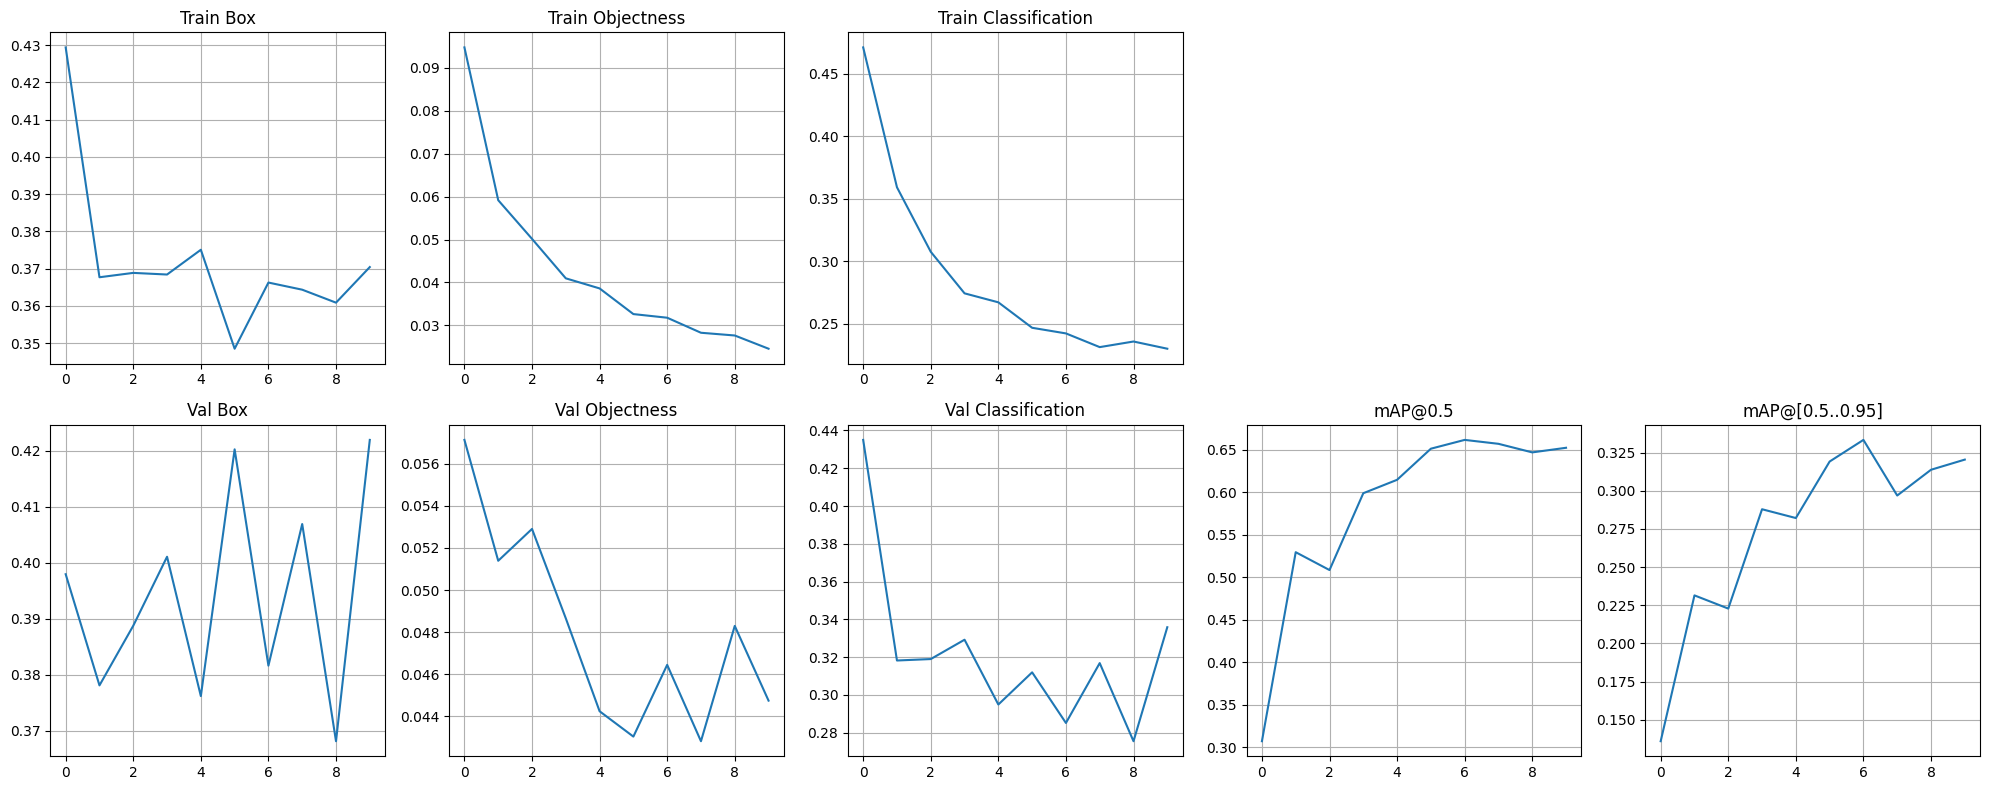

In [8]:
###############################
# 8) Plot Hasil
###############################
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# Row 1: Training Loss
axs[0,0].plot(train_box, label='Train Box')
axs[0,0].set_title("Train Box")
axs[0,1].plot(train_obj, label='Train Objectness')
axs[0,1].set_title("Train Objectness")
axs[0,2].plot(train_cls, label='Train Classification')
axs[0,2].set_title("Train Classification")
# Kita hapus Precision & Recall sesuai permintaan
axs[0,3].axis('off')
axs[0,4].axis('off')

# Row 2: Validation Loss and mAP
axs[1,0].plot(val_box, label='Val Box')
axs[1,0].set_title("Val Box")
axs[1,1].plot(val_obj, label='Val Objectness')
axs[1,1].set_title("Val Objectness")
axs[1,2].plot(val_cls, label='Val Classification')
axs[1,2].set_title("Val Classification")
axs[1,3].plot(map50_list, label='mAP@0.5')
axs[1,3].set_title("mAP@0.5")
axs[1,4].plot(map95_list, label='mAP@[0.5..0.95]')
axs[1,4].set_title("mAP@[0.5..0.95]")

for ax in axs.flat:
    ax.grid(True)
plt.tight_layout()
plt.show()

# Inference test set
1. Definisi Test Dataset dan DataLoader
2. Buat Mapping dari Kategori ke Label (Nama Kategori)
3. Fungsi Inference dan Visualisasi


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
Mapping ID ke Label: {0: 'creatures', 1: 'fish', 2: 'jellyfish', 3: 'penguin', 4: 'puffin', 5: 'shark', 6: 'starfish', 7: 'stingray'}


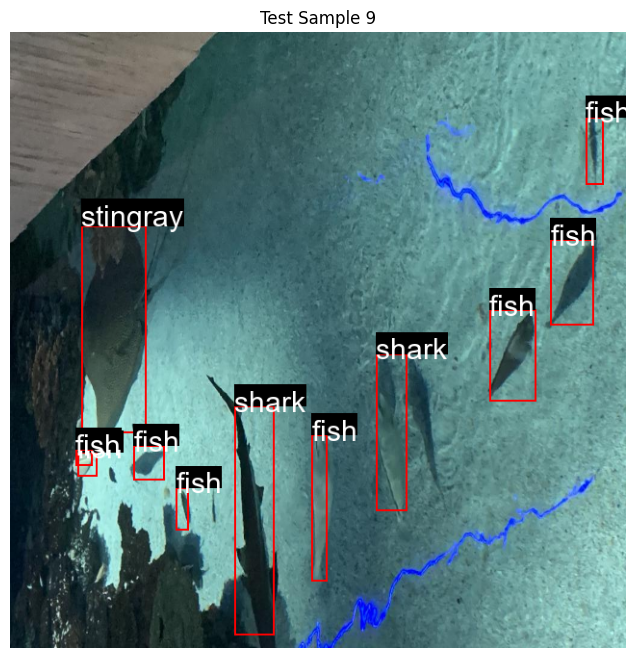

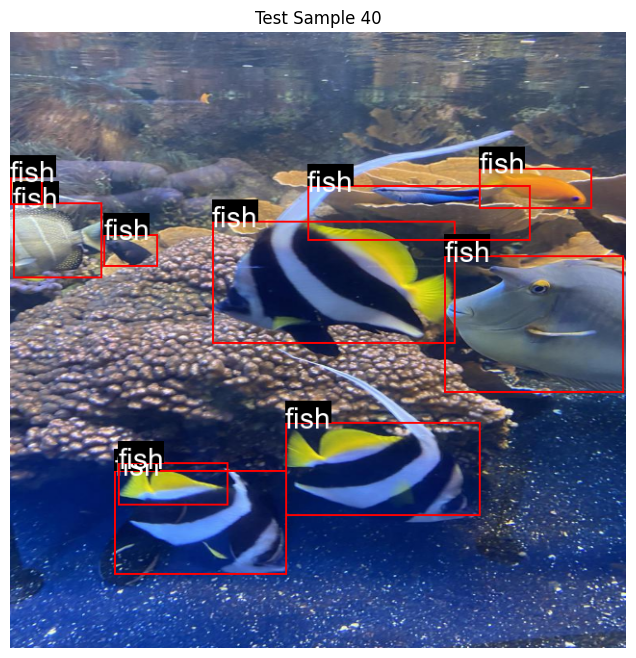

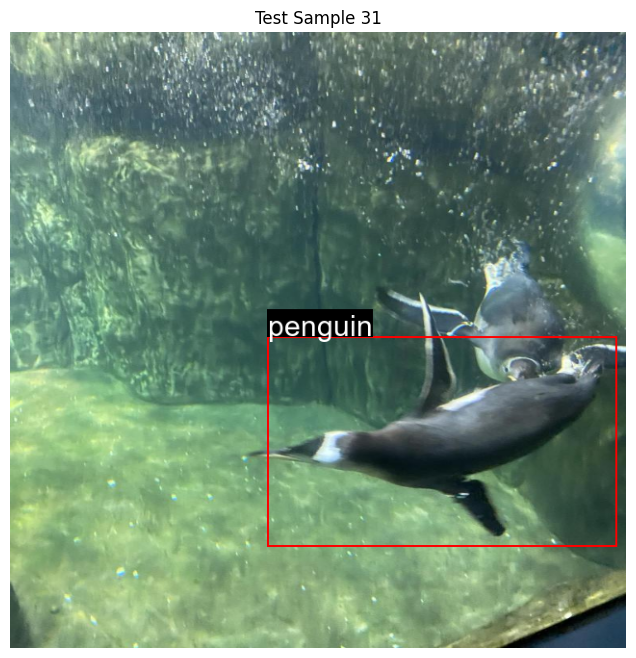

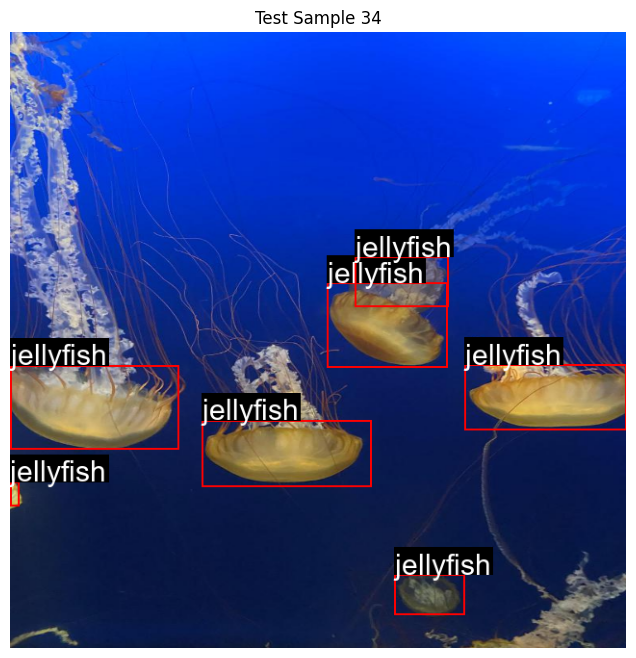

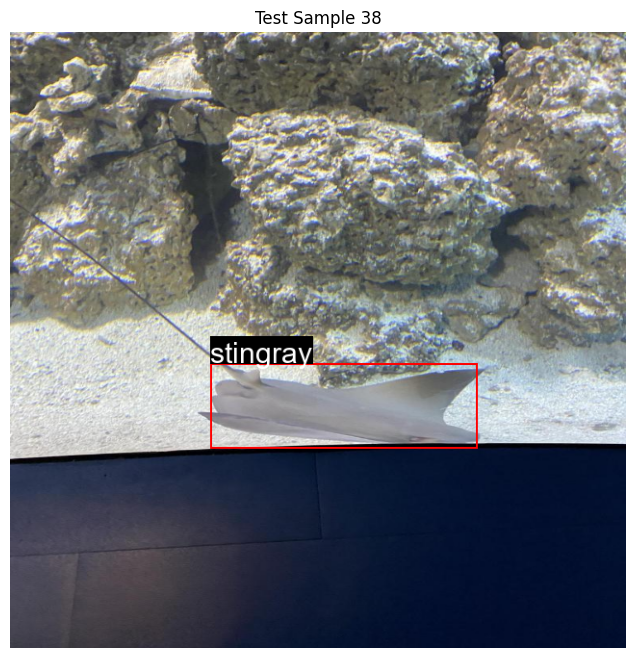

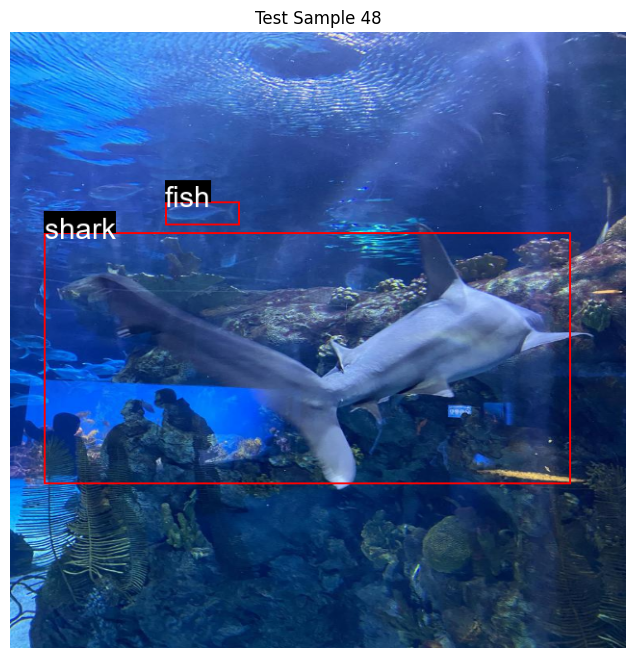

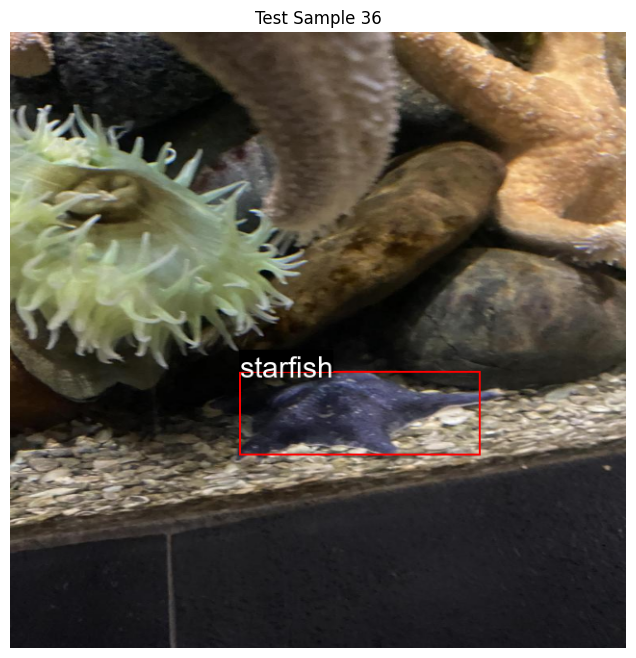

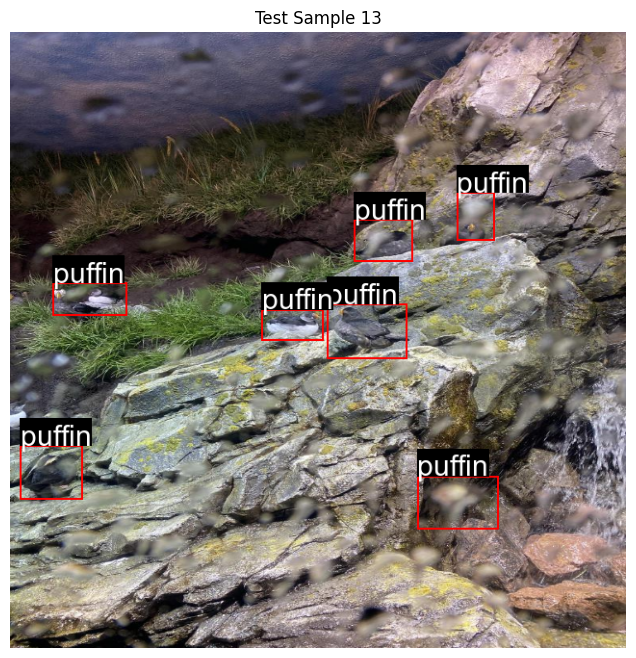

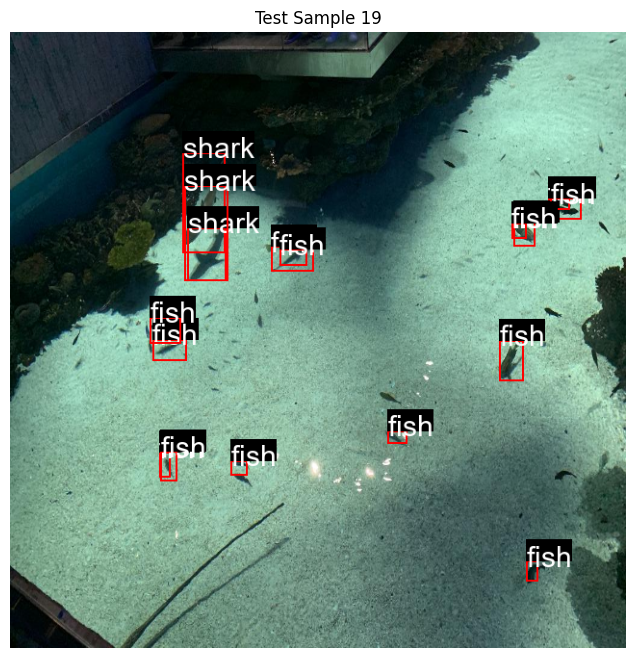

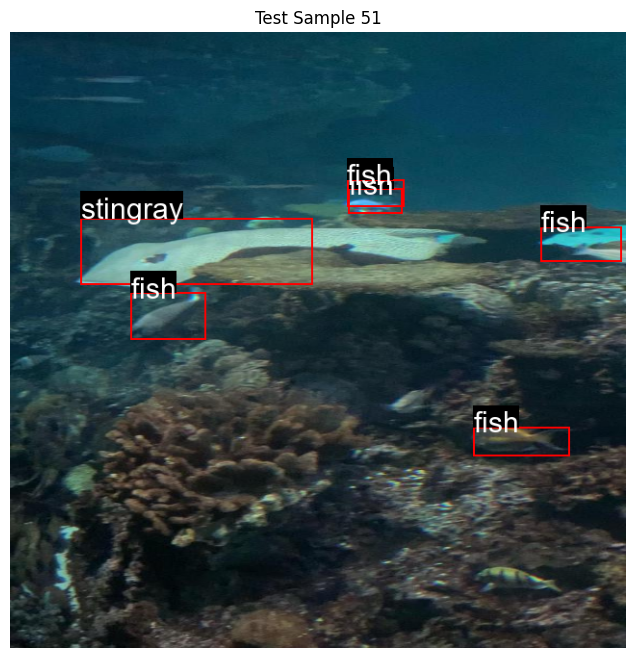

In [22]:
import random
from PIL import ImageDraw, ImageFont
import torchvision.transforms as T
import matplotlib.pyplot as plt
from torchvision.ops import nms

# 1. Definisikan test dataset (gunakan split 'test')
test_dataset = AquariumDetection(dataset_path, split='test', transforms=get_transforms(train=False))

# 2. Buat mapping dari kategori ke label (dari file anotasi training)
coco_train = COCO(os.path.join(dataset_path, "train", "_annotations.coco.json"))
id2label = {cat_id: cat['name'] for cat_id, cat in coco_train.cats.items()}
print("Mapping ID ke Label:", id2label)

# 3. Pilih 10 sample secara random
num_samples = 10
random_indices = random.sample(range(len(test_dataset)), num_samples)

# 4. Fungsi untuk menggambar bounding box dan label menggunakan PIL
def draw_boxes_with_labels(image_tensor, boxes, label_names, font_path="arial.ttf", font_size=30):
    """
    Menggambar bounding boxes dan label pada gambar menggunakan PIL.
    - image_tensor: tensor gambar dengan shape [C, H, W] (nilai [0,255], tipe uint8)
    - boxes: tensor bounding boxes [N, 4] (format xyxy)
    - label_names: list label (string) untuk masing-masing bounding box
    - font_path: path ke file font TTF (default "arial.ttf")
    - font_size: ukuran font label
    """
    to_pil = T.ToPILImage()
    pil_img = to_pil(image_tensor)
    draw = ImageDraw.Draw(pil_img)
    try:
        font = ImageFont.truetype(font_path, font_size)
    except Exception as e:
        print("Error loading font, using default font:", e)
        font = ImageFont.load_default()
    
    for i, box in enumerate(boxes):
        xmin, ymin, xmax, ymax = box.tolist()
        # Gambar bounding box dengan warna merah
        draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=2)
        # Menghitung ukuran teks menggunakan textbbox
        text_bbox = draw.textbbox((0,0), label_names[i], font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]
        # Tentukan posisi latar belakang: gunakan ymin - text_height, tapi jangan kurang dari 0
        text_bg_top = max(ymin - text_height, 0)
        text_bg_coords = [xmin, text_bg_top, xmin + text_width, text_bg_top + text_height]
        # Gambar latar belakang hitam
        draw.rectangle(text_bg_coords, fill="black")
        # Gambar teks label dengan warna putih
        draw.text((xmin, text_bg_top), label_names[i], fill="white", font=font)
    
    return pil_img

# 5. Lakukan inference dan visualisasi untuk 10 sample random dengan NMS dan filtering degenerate
model.eval()
with torch.no_grad():
    for idx in random_indices:
        # Ambil data dari dataset test
        image, target = test_dataset[idx]
        image_tensor = image.unsqueeze(0).to(device)  # Batch size = 1
        
        # Lakukan prediksi
        output = model(image_tensor)[0]  # output adalah dict
        
        # Ambil boxes, scores, dan labels dari output
        boxes = output['boxes'].cpu()
        scores = output['scores'].cpu()
        labels = output['labels'].cpu()
        
        # Filter prediksi berdasarkan threshold skor
        score_threshold = 0.5
        score_mask = scores > score_threshold
        boxes = boxes[score_mask]
        scores = scores[score_mask]
        labels = labels[score_mask]
        
        # Filter bounding box yang valid: pastikan x_max > x_min dan y_max > y_min
        if boxes.numel() > 0:
            valid_mask = (boxes[:, 2] > boxes[:, 0]) & (boxes[:, 3] > boxes[:, 1])
            boxes = boxes[valid_mask]
            scores = scores[valid_mask]
            labels = labels[valid_mask]
        
        # Terapkan Non-Maximum Suppression (NMS) untuk menghilangkan duplikasi
        nms_threshold = 0.5
        if boxes.numel() > 0:
            keep = nms(boxes, scores, nms_threshold)
            boxes = boxes[keep]
            labels = labels[keep]
        
        # Buat list label nama dari mapping id2label
        label_names = [id2label[label.item()] for label in labels]
        
        # Konversi gambar ke rentang [0,255] dan tipe uint8
        image_uint8 = (image * 255).to(torch.uint8)
        
        # Gambar bounding boxes dan label dengan fungsi kustom
        pil_result = draw_boxes_with_labels(image_uint8, boxes, label_names, font_path="arial.ttf", font_size=30)
        
        plt.figure(figsize=(12, 8))
        plt.imshow(pil_result)
        plt.title(f"Test Sample {idx}")
        plt.axis("off")
        plt.show()
